# Next Big Thing Pipeline

### Standard Python Library Imports

In [ ]:
import import_ipynb
from datetime import date, timedelta

### Imports from Next Big Thing Jupyter Notebooks

In [ ]:
#Find Category
import Step1_Find_Category_From_Thing as fcat


importing Jupyter notebook from Step1_Find_Category_From_Thing.ipynb


2022-04-22 19:00:42 INFO: Downloading default packages for language: en (English)...
2022-04-22 19:00:46 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-04-22 19:00:51 INFO: Finished downloading models and saved to /root/stanza_resources.
Installing /root/venv/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/deepnote-config/ju

In [ ]:
#Find subreddits
import Step2_Find_Subreddits as fsub

importing Jupyter notebook from Step2_Find_Subreddits.ipynb


In [ ]:
#Find influencers
import Step3_Find_Influencers as finf

importing Jupyter notebook from Step3_Find_Influencers.ipynb


In [ ]:
#Find relevant influencer posts
import Step4_Find_Influencer_Relevant_Posts as fposts

importing Jupyter notebook from Step4_Find_Influencer_Relevant_Posts.ipynb


In [ ]:
#Create CRF model to find new terms in unseen Reddit posts
import Step5_CRF_Find_New_Terms as crfnt

importing Jupyter notebook from Step5_CRF_Find_New_Terms.ipynb


2022-04-23 00:16:07 INFO: Downloading default packages for language: en (English)...


2022-04-23 00:16:21 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-04-23 00:16:21 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-04-23 00:16:21 INFO: Use device: cpu
2022-04-23 00:16:21 INFO: Loading: tokenize
2022-04-23 00:16:21 INFO: Loading: pos
2022-04-23 00:16:22 INFO: Done loading processors!
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.78 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


### Set Parameter Values 
The parameters will indicate how large our search scope will be within Reddit, as well as indicating whether we are running in Minimum Viable Product (MVP) mode.

Our MVP mode uses pre-created pickle files for selected topics that have already been run through the full pipeline to quickly generate a result for viewing.

In [ ]:
#Set Parameters

# For determining if existing pickle files will be used for this run. If true, if a pickle file 
# has already been created for this item, it will be used instead of retrieving fresh data 
# from Reddit
mvp_flag = False 

#For selecting subreddits
num_subreddits = 10 #Number of subreddits we will return for the analysis
min_subreddit_subscribers = 20000 #Size limit on a subreddit for inclusion in analysis

#For finding influencers
num_submissions = 50 #Number of submissions retrieved for each subreddit
num_influencers = 5 #Number of influencers returned as a ranked list - use equal sub to adjust 
                    #overall or per subreddit
min_occur = 2 #Minimum number of times a redditor must appear in ranking list
max_com = 0 #Maximum comment request limit (32 per request) for a submission (0 retrieves all)
load_subm = False #Loads pickle file if available for posts versus retrieving through api
equal_sub = True #If true, changes function to return num_influencers from each subreddit

#For finding relevant posts from influencers
per_author_limit=500 #Maximum number of comments to be returned for one user
post_limit = 10000 #Maximum number of comments/submissions to return from this process
end_date = (date.today() + timedelta(days=1)).strftime("%m/%d/%Y")  #Posts dated before this date will be included
start_date = (date.today() - timedelta(days=31)).strftime("%m/%d/%Y") #Posts dated after this date will be included




### What are we finding the Next Big Thing of?

In [ ]:
#term = 'The Avengers Film' 
wiki_term = 'Squid Game'


### Step 1: Get initial Wikipedia data about our user entry
This step finds the Wikipedia entry for our user entered item. It runs the Wikipedia summary of the item, found at the top of the webpage, through NLP processing to identify what we refer to as the NLP category of the item, and also finds the Wikipedia categories for the item. It filters the Wikipedia categories for those that are relevant to our original item, and creates new categories based on years/decades, that we can hopefully use to identify "newer" categories of the same subject. For example, for Squid Game:

#### wiki_term
'Squid Game'

#### nlp_cat_phrase
['Korean', 'drama', 'television', 'series']

#### best_wiki_cats
['Category:2021 South Korean television series debuts',
'Category:South Korean action television series',
'Category:South Korean horror fiction television series',
'Category:South Korean thriller television series',
'Category:Television shows set in Seoul']

#### wiki_cats
['Category:South Korean thriller television series',
'Category:2021 South Korean television series debuts',
'Category:South Korean horror fiction television series',
'Category:2020 South Korean television series debuts',
'Category:2018 South Korean television series debuts',
'Category:2022 South Korean television series debuts',
'Category:2019 South Korean television series debuts',
'Category:South Korean action television series',
'Category:Television shows set in Seoul']


In [ ]:
#Get category data
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term = fcat.get_category_from_search_term(term, mvp_flag)

first_wiki_term: The Avengers (2012 film)
nlp phrase: ['Marvel']
wiki_cats: ['Category:2010s fantasy adventure films', 'Category:2010s superhero films', 'Category:2012 3D films', 'Category:2012 films', 'Category:2012 science fiction action films', 'Category:Alien invasions in films', 'Category:American 3D films', 'Category:American fantasy adventure films', 'Category:American films', 'Category:American science fantasy films', 'Category:American science fiction action films', 'Category:American science fiction war films', 'Category:Avengers (film series)', 'Category:English-language films', 'Category:Fictional portrayals of the New York City Police Department', 'Category:Films about extraterrestrial life', 'Category:Films about mind control', 'Category:Films about wormholes', 'Category:Films directed by Joss Whedon', 'Category:Films scored by Alan Silvestri', 'Category:Films set in 2012', 'Category:Films set in Germany', 'Category:Films set in Kolkata', 'Category:Films set in New York C

In [ ]:
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term


(['Marvel'],
 ['Category:American science fantasy films',
  'Category:Superhero crossover films',
  'Category:2020s superhero films',
  'Category:2010s superhero films',
  'Category:Marvel Cinematic Universe: Phase One',
  'Category:Superhero adventure films'],
 ['Category:Marvel Cinematic Universe: Phase One',
  'Category:Superhero crossover films',
  'Category:Superhero adventure films',
  'Category:2010s superhero films',
  'Category:American science fantasy films'],
 'The Avengers (2012 film)')

### Step 2: Get Subreddits
This step runs combinations of the NLP category words as well as the Wiki term through the Reddit subreddit search API to find subreddits that are likely to contain the words. After pulling back many possibilities for subreddits, it uses cosine similarity between the potential subreddit (using a combination of name, title, and description) and the wiki categories to select the "best" subreddits to interrogate for information on our Next Big Thing.


In [ ]:

#Get subreddits
subreddits_list = fsub.get_subreddits(wiki_term, nlp_cat_phrase, best_wiki_cats, num_subreddits, min_subreddit_subscribers, mvp_flag)


In [ ]:
subreddits_list

['comicbookmovies',
 'MarvelLegends',
 'shield',
 'Defenders',
 'MarvelStudiosSpoilers',
 'SpidermanPS4',
 'xmen',
 'MarvelStrikeForce',
 'marvelstudios',
 'DCcomics']

### Step 3: Get Influencers
This step evaluates users based on an aggregate score of their posts (comments and submissions) in the previously identified subreddits, as well as their overall Reddit Karma scores

In [ ]:
#Get influencers
listInfluencers = finf.get_influencers(subreddits_list, num_submissions, num_influencers, min_occur, mvp_flag, load_subm, wiki_term, max_com, equal_sub)

gathering submissions from comicbookmovies subreddit...
50 posts gathered so far...
gathering submissions from MarvelLegends subreddit...
100 posts gathered so far...
gathering submissions from shield subreddit...
150 posts gathered so far...
gathering submissions from Defenders subreddit...
187 posts gathered so far...
gathering submissions from MarvelStudiosSpoilers subreddit...
237 posts gathered so far...
gathering submissions from SpidermanPS4 subreddit...
287 posts gathered so far...
gathering submissions from xmen subreddit...
337 posts gathered so far...
gathering submissions from MarvelStrikeForce subreddit...
387 posts gathered so far...
gathering submissions from marvelstudios subreddit...
437 posts gathered so far...
gathering submissions from DCcomics subreddit...
487 posts gathered so far...
complete with 101417 comments and 487 submissions
collecting comment karma for top 250 authors...
75 influencers found so far...
Top 5 influencers added from comicbookmovies subreddit

In [ ]:
listInfluencers

['MarvelsGrantMan136',
 'chanma50',
 'The_Iceman2288',
 'l_l_l-illiam',
 'diligent_royal_eagle',
 'Officer_Zack',
 'Matapple13',
 'suburban_drifter928',
 'Rchaushesku',
 'DrDreidel82',
 'wallcrawlingspidey',
 'Cha_Boi20',
 'MIAxPaperPlanes',
 'cbekel3618',
 'Dylan_cinema',
 'Michael-Balchaitis',
 'NitroCoop',
 'Benjamin_Grimm',
 'ElijahChahine',
 'Ronenthelich',
 'JohannSchmidt1943',
 'GladiusNocturno',
 'CosmosBazaar',
 'Hatefull_creeper2',
 'diedtowin',
 'nowhereman136',
 'Infernalism',
 'LittleYellowFish1',
 'blackbutterfree',
 'KostisPat257',
 'Danishroyalty',
 'Grayson81',
 'Vaeon',
 'brokensilence32',
 'magikarpcatcher',
 '_Levitated_Shield_',
 'DaHyro',
 'ClassicT4',
 'Vadermaulkylo',
 'WarWolf343',
 'HearTheEkko',
 'Tornado31619',
 'goboxey',
 'Brjgjdj5788',
 'ab316_1punchd',
 'DeadSweetHenrietta',
 'Caciulacdlac',
 'metros96',
 'Kolenga',
 'lr031099',
 'hushpolocaps69',
 'mega512',
 'albene',
 'Saucefest6102',
 'DarthDregan',
 'Colton826',
 'AlwaysBi',
 'CaptHayfever',
 'lance

### Step 4: Get influencer relevant posts
This step finds all posts made by the influential users in the identified subreddits in a provided timeframe. If there are more posts than the parameter limit, cosine similarity between the post and the best_wiki_cats is used to determine the top posts to move to the next step of the process. 

In [ ]:
#Get relevant posts
relevant_posts = fposts.get_relevant_posts(wiki_term, listInfluencers, subreddits_list, start_date, end_date, best_wiki_cats, per_author_limit, post_limit, mvp_flag)


Start time for retrieving comments:  2022-04-22 15:27:38
Finding comments for Caciulacdlac...
Finding comments for seven_ice...
Finding comments for wallcrawlingspidey...
Finding comments for DJ_Binding...
Finding comments for TommyTheGeek...
Finding comments for Benjamin_Grimm...
Finding comments for agaperion...
Finding comments for albene...
Finding comments for JackFisherBooks...
Finding comments for GladiusNocturno...
Finding comments for lanceturley...
Finding comments for Snoo-2013...
Finding comments for AdAffectionate7872...
Finding comments for Dylan_cinema...
Finding comments for JohannSchmidt1943...
Finding comments for Techster17...
Finding comments for ClassicT4...
Finding comments for regmckie...
Finding comments for Black-kage...
Finding comments for DaHyro...
Finding comments for MagicBez...
Finding comments for clam_media...
Finding comments for nowhereman136...
Finding comments for chanma50...
Finding comments for cbekel3618...
Finding comments for MIAxPaperPlanes...

In [ ]:
relevant_posts[:10]

["*Superhero Movie I:  The Origin Story.* Here we introduce the main character and their world.\n\n\n*Superhero Movie 2:  Make More Money* Here the main character loses their powers temporarily so they can relearn how to be Heroic.\n\n*Superhero Movie 3:  Close Out First Trilogy, Set Up Spin-Offs* Here the hero fights more enemies than ever before, including an evil version of themselves.\n\nThe Sinister Six *is* the Holy Grail of solo superhero movies because it's a solo hero against a gang of superhumans...and it's comics accurate.",
 'Marvel.',
 'x-men and fantastic 4',
 'Maybe Jessica Jones in She-Hulk, and Luke Cage in Captain America 4, and Iron Fist in Shang-Chi 2, and the Punisher in Armor Wars',
 'Maybe The Marvels?',
 'Marvel right now, which is supported by the lack of SW movies',
 'Batman: The Animated Series\n\nSuperman: The Animated Series\n\nJustice League\n\nJustice League: Unlimited\n\nBatman: Beyond',
 'First non Avengers series to get a fourth movie',
 'This is prett

### Step 5: Identify Next Big Thing
This step creates a "white list" or dictionary of potential items from accumulating a large number of "siblings" based articles found in the Wikipedia categories. 
The sibling articles are also used to train a model for Conditional Random Field (CRF), in order to also allow the solution to identify unseen siblings that may be present in the relevant posts.

In [ ]:
#Find and rank top results
df_final = crfnt.calculate_final_results_for_wiki_term(wiki_term, mvp_flag)



Wikipedia term: Squid Game
See wikipedia categories and number of article saved as training data to be labeled.
Category:South Korean action television series 93 93
Category:South Korean horror fiction television series 104 11
Category:Television shows set in Seoul 130 26
Category:2022 South Korean television series debuts 205 75
Category:2019 South Korean television series debuts 349 144
Category:2021 South Korean television series debuts 463 114
Category:South Korean thriller television series 575 112
Category:2018 South Korean television series debuts 728 153
Category:2020 South Korean television series debuts 851 123
Dumping: ./output_step5/dict200_labeled_cat_sentences_Squid_Game.pickle
25972 sentences from wikipedia available to train on
Counter({'N': 626828, 'Y': 7090}) numbers of each label from wikipedia
Ready to train.
Trainer created, will use max of 10000 of 20777 items
Training data joined
training with params: ['feature.minfreq', 'feature.possible_states', 'feature.possib

KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Output

In [ ]:
print('The top 10 items found for the Next Big Thing are:')


df_final[['Entity','CRF_Model_Found']].head(10)


The top 10 items found for the Next Big Thing are:


,Entity,CRF_Model_Found
129,MORBIUS,127.0
230,VENOM,96.0
81,ETERNALS,75.0
73,DOCTOR STRANGE,72.0
51,BLACK WIDOW,57.0
68,CAPTAIN MARVEL,47.0
102,GREEN LANTERN,44.0
241,WONDER WOMAN,39.0
207,THOR,31.0
46,BLACK PANTHER,25.0


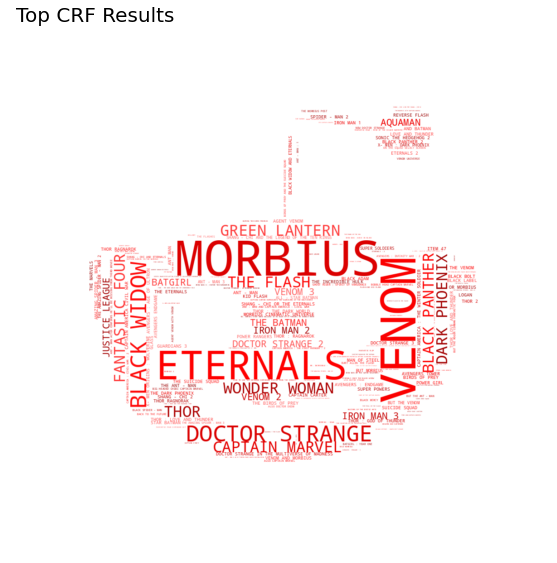

In [ ]:

crfnt.make_wordcloud(df_final)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90b052a7-f47d-474e-888f-9345355cfd9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>